In [1]:
!pip install gradio

     |████████████████████████████████| 1.1MB 8.6MB/s 
     |████████████████████████████████| 215kB 27.7MB/s 
     |████████████████████████████████| 962kB 27.5MB/s 
     |████████████████████████████████| 3.2MB 21.9MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=003c42c324a0a25b1b026fa57bc99d617638415ac4f1d7d5723faccdd78ba1d2
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=753cffaa75a2f104ec55d229ba607212329b502cc5e242a259eb26d0bcf3dc4d
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for Flask-BasicAuth: filename=Flask_BasicAuth-0.2.0-cp37-none-any.whl size=4232 sha256=4582da3b85970710c55c662ce41d6f6031835b1a140a20c851e7be885f3a3d0e
  Stored in director

In [2]:
import gradio as gr

In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt
import numpy as np


In [5]:
objects = tf.keras.datasets.mnist

In [6]:
(training_images,training_labels),(test_images,test_labels) = objects.load_data()

11493376/11490434 [==============================] - 0s 0us/step


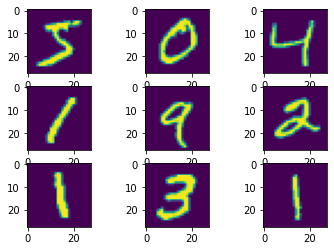

In [7]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(training_images[i])

In [8]:
training_images = training_images/255.0
test_images = test_images/255.0

In [9]:
from tensorflow.keras.layers import Flatten,Dense

In [10]:
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)),
                                    Dense(256,activation='relu'),
                                    Dense(256,activation='relu'),
                                    Dense(128,activation='relu'),
                                    Dense(10,activation=tf.nn.softmax)])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3660 - accuracy: 0.8878
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0925 - accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0347 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0255 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [13]:
test = test_images[0].reshape(-1,28,28)
pred = model.predict(test)
print(pred)

[[4.0408164e-14 6.9822414e-13 8.2377524e-13 1.6121948e-11 3.5838185e-10
  1.7552405e-13 2.5418039e-20 1.0000000e+00 2.7160351e-13 4.4354604e-08]]


In [14]:
def predict_images(img):
  img_3d = img.reshape(-1,28,28)
  img_resize = img_3d/255.0
  prediction = model.predict(img_resize)
  pred = np.argmax(prediction)
  return pred

In [15]:
iface = gr.Interface(predict_images,
                     inputs='sketchpad',
                     outputs='label')

In [ ]:
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://26830.gradio.app
Interface loading below...
